In [36]:
from rdkit.Chem import rdFingerprintGenerator
import matplotlib.pyplot as plt
import scipy.stats as ss
from rdkit import Chem
import pandas as pd
import numpy as np
import os

plt.rcParamsDefault['figure.dpi'] = 150

In [19]:
# Get original DrugBank SMILES
drugbank_smiles = pd.read_csv(os.path.join("../other/DrugBank/drugbank_smiles.csv"))['Smiles'].tolist()
drugbank_smiles = sorted(drugbank_smiles)
SMILES = ['smiles']

# Check which SMILES are valid and generate fingerprints
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3, fpSize=2048)
for smiles in drugbank_smiles:
    try:
        mol = Chem.MolFromSmiles(smiles)
        mfp = mfpgen.GetCountFingerprint(mol).ToList()
        SMILES.append(smiles)
    except:
        pass

with open(os.path.join("../other/models/model_example/framework/examples/run_input.csv"), "w") as f:
    f.write("\n".join(SMILES))

[16:58:27] Explicit valence for atom # 13 Be, 3, is greater than permitted
[16:58:27] Explicit valence for atom # 19 O, 3, is greater than permitted
[16:58:27] Explicit valence for atom # 4 F, 2, is greater than permitted
[16:58:27] Explicit valence for atom # 13 Cl, 5, is greater than permitted
[16:58:28] Explicit valence for atom # 1 Cl, 4, is greater than permitted
[16:58:28] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
[16:58:28] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1'
[16:58:28] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(

In [1]:
### PLOT CORRELATIONS ###

In [7]:
RESULTS = pd.read_csv(os.path.join("../other/models/model_example/framework/examples/run_output.csv"))
columns = RESULTS.columns.tolist()
consensus = RESULTS['0_consensus_score'].tolist()

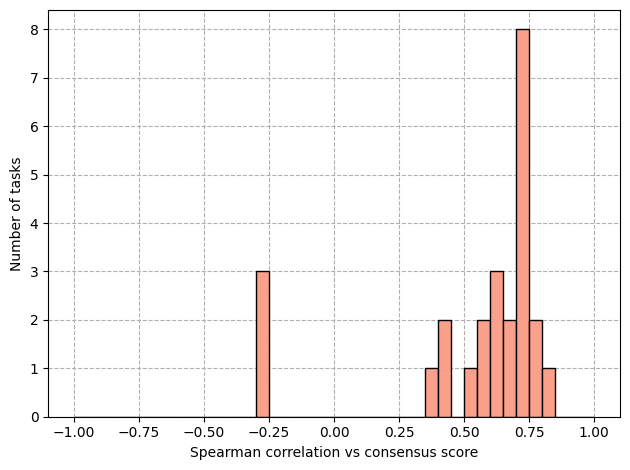

In [40]:
correlations = []
for col in columns[1:]:
    correlations.append(ss.spearmanr(consensus, RESULTS[col].tolist()))
correlations = [i.statistic for i in correlations]

bins = [i for i in np.arange(-1, 1.0001, 0.05)]
plt.hist(correlations, bins=bins, ec='k', zorder=2, color='#FAA08B')

plt.ylabel('Number of tasks')
plt.xlabel('Spearman correlation vs consensus score')
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()